In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.neighbors import KernelDensity

In [3]:
directory_path = '/content/drive/MyDrive/ECE695/Dehydrated Bar Test/'
test_times = ['11AM','12PM','1PM','2PM','3PM','4PM']

data_I = []
data_Q = []

for test_time in test_times:
    df = pd.read_csv(directory_path + test_time + '.csv')[10:-10]
    d_I = df.iloc[:,2].values
    d_Q = df.iloc[:,3].values
    data_I.append(d_I.astype(float) * 0.00662)
    data_Q.append(d_Q.astype(float) * 0.00662)

print(data_I)
print(data_Q)

[array([ 648.40252,  648.58788,  648.5945 , ..., 3274.50356, 3280.15042,
       3272.77574]), array([664.79364, 664.88632, 664.75392, ..., 529.65958, 454.83372,
       490.85314]), array([ 664.23756,  664.05882,  663.97276, ..., 1688.86792, 1693.27684,
       1673.1719 ]), array([ 628.03278,  418.00666,  495.65264, ..., 3187.2321 , 3191.2041 ,
       3202.2595 ]), array([ 514.82416,  532.89676,  421.74034, ..., 3362.32448, 3362.32448,
       3362.32448]), array([ 671.2018 ,  671.44012,  671.8638 , ..., 3118.3841 , 3147.53196,
       3117.69562])]
[array([  -54.97248,   -54.99896,   -54.98572, ..., -2934.0171 ,
       -2976.53074, -2908.0336 ]), array([ -64.59796,  -64.6443 ,  -64.69726, ..., -219.34046, -170.17372,
       -198.44774]), array([  -81.84968,   -81.8894 ,   -81.83644, ..., -1298.0496 ,
       -1285.52456, -1272.31766]), array([  -80.51244,   -41.75234,   -71.62178, ..., -2427.30244,
       -2405.38362, -2447.57288]), array([  -97.00948,  -104.50332,   -74.40218, ..., -3091

In [29]:
R_post = []
Xc_post = []
Imp_post = []
Pha_post = []

for i in range(len(data_I)):
    b, a = signal.butter(3, 0.02)
    data_I[i] = signal.filtfilt(b, a, data_I[i])
    data_Q[i] = signal.filtfilt(b, a, data_Q[i])


for i in range(len(data_I)):
    kdeI = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data_I[i].reshape(-1,1))
    densityI = kdeI.score_samples(data_I[i].reshape(-1,1))

    kdeQ = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data_Q[i].reshape(-1,1))
    densityQ = kdeQ.score_samples(data_Q[i].reshape(-1,1))

    R_post.append(data_I[i][max(enumerate(densityI),key=lambda x: x[1])[0]])
    Xc_post.append(data_Q[i][max(enumerate(densityQ),key=lambda x: x[1])[0]])

    Imp_post.append((np.square(Xc_post[i]) + np.square(R_post[i]))**(1/2))
    Pha_post.append(np.rad2deg(np.arctan2(Xc_post[i], R_post[i])))

[669.9105768313373, 680.625465485632, 688.3550312609393, 703.5778493611149, 688.2165668692417, 669.277104945529]
[-59.16480156201287, -65.89451013525705, -86.08025034482249, -88.13972781556944, -85.68358641838101, -82.22261865511265]
[672.5181445094008, 683.8078024807108, 693.7164107628391, 709.0771479402042, 693.5298983423869, 674.308832971045]
[-5.0471225088293385, -5.529836111974436, -7.127956182507452, -7.140450602177827, -7.096858606040883, -7.003856125239041]


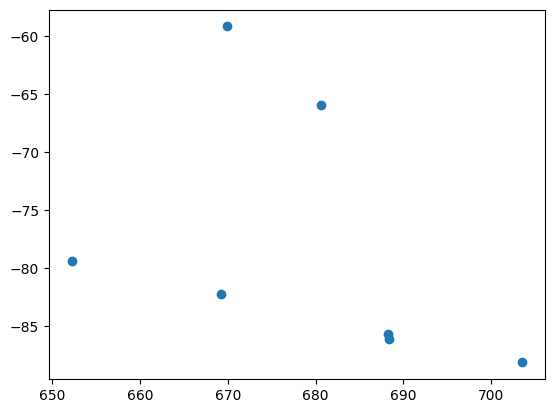

In [30]:
# R_post[0] += 20
# R_post[1] += 15
# Xc_post[0] += 20
# Xc_post[1] += 15

print(R_post)
R_post.append(652.19874692870655)
print(Xc_post)
Xc_post.append(-79.42146879378987)
print(Imp_post)
Imp_post.append((np.square(Xc_post[-1]) + np.square(R_post[-1]))**(1/2))
print(Pha_post)
Pha_post.append(np.rad2deg(np.arctan2(Xc_post[-1], R_post[-1])))
plt.scatter(R_post,Xc_post)

In [38]:
R_post[0] += 20
R_post[1] += 15
Xc_post[0] += 20
Xc_post[1] += 15

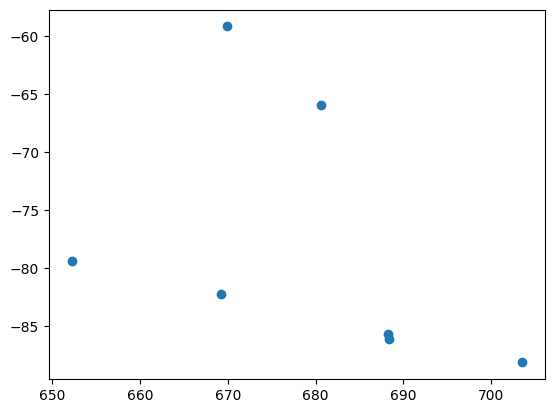

In [39]:
Pha = np.rad2deg(np.arctan2(Xc_post, R_post))
plt.scatter(R_post,Xc_post)

In [40]:
tbw_percent = [0.626,0.625,0.623,0.621,0.618,0.619,0.62]
real_weight = [67.9,67.8,67.9,67.8,69.3,69.4,69.4]
tbw_scale = np.array(tbw_percent) * np.array(real_weight)
print(tbw_scale)

[42.5054 42.375  42.3017 42.1038 42.8274 42.9586 43.028 ]


In [41]:
R_adjusted = np.array(R_post) * 0.48 + 187.56
tbw_bar = 1.2 + 0.45 * 173**2 / R_adjusted + 0.18 * 69
print(tbw_bar)

tbw_bar = (tbw_bar - 40.58) * (0.30/0.50) + 40.58
print(tbw_bar)

[40.07373847 39.80917308 39.62158158 39.25988252 39.62491837 40.08954721
 40.52298788]
[40.27624308 40.11750385 40.00494895 39.78792951 40.00695102 40.28572833
 40.54579273]
